# HHW05 – Data Dive
## Group 5 

## Create the Data Dive Jupyter Notebook.

## Import Libraries
* Importing required libraries

In [1]:
# Importing necessary libraries
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
# Importing the CSV file
df_listings = pd.read_csv('data/listings.csv.gz', compression='gzip',index_col=None, header=0, sep=',', quotechar='"')
df_calendar = pd.read_csv('data/calendar.csv.gz', compression='gzip',index_col=None, header=0, sep=',', quotechar='"')
df_reviews = pd.read_csv('data/reviews.csv.gz', compression='gzip',index_col=None, header=0, sep=',', quotechar='"')
df_cal_listings = pd.read_csv('data/cal_listings.csv.gz', compression='gzip',index_col=None, header=0, sep=',', quotechar='"')
df_listing_reviews = pd.read_csv('data/listings_review.csv.gz', compression='gzip',index_col=None, header=0, sep=',', quotechar='"')
amenities = pd.read_csv('data/amenitiesdummies_top87.csv')
df_hosts = pd.read_csv('data/hosts.csv')


In [3]:
# Displaying all of the columns in the df_cal_listings dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_cal_listings.head()

,listing_id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_Pack\u2019nPlay/travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Children\u2019sbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Children\u2019sdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,cal_available,cal_price,cal_minimum_nights,cal_maximum_nights,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2021,year_2022
0,6422,Nashville Charm,30 day or more rental during COVID. Show COVID...,12172,Michele,4451.0,NaN,19%,1,NaN,0.0,0.0,1,1,"Nashville, Tennessee, United States",36.17315,-86.73581,Private room in house,Private room,2,1.0,2.0,3.0,40.0,30,365,1,3,3,3,267,674,6,0,4424.0,464.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,4.69,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,40.0,30.0,365.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,6422,Nashville Charm,30 day or more rental during COVID. S

In [4]:
# Listing out column names and data types
df_listing_reviews.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 197 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    listing_id                                    5122 non-null   int64  
 1    name                                          5122 non-null   object 
 2    description                                   5101 non-null   object 
 3    host_id                                       5122 non-null   int64  
 4    host_name                                     5116 non-null   object 
 5    host_since                                    5122 non-null   float64
 6    host_response_rate                            4397 non-null   object 
 7    host_acceptance_rate                          4795 non-null   object 
 8    host_is_superhost                             5122 non-null   int64  
 9    host_neighbourhood                            2237

##### Property Types

In [5]:

property_counts = df_cal_listings['property_type'].value_counts()

# Display the number of unique neighborhoods
print("Number of different property Types:", len(property_counts))

# Display the counts of each neighborhood
print(property_counts)


Number of different property Types: 48
property_type
Entire house                         623109
Entire apartment                     351889
Entire condominium                   219750
Entire townhouse                     200770
Private room in house                120462
Entire guest suite                    86152
Entire loft                           46364
Entire guesthouse                     44906
Room in boutique hotel                26282
Entire bungalow                       25187
Private room in apartment             16062
Entire cottage                        14602
Private room in townhouse             13872
Entire serviced apartment             12776
Room in hotel                          9490
Private room in guest suite            8397
Room in aparthotel                     5475
Private room in condominium            4380
Tiny house                             4015
Entire cabin                           3287
Camper/RV                              2921
Private room in bungalo

#### Merge Examaple for df_all

In [6]:

# Merge listings with calendar on 'id' and 'listing_id'
df_listings_calendar = pd.merge(df_listings, df_calendar, left_on='id', right_on='listing_id', how='left')

# Merge the above result with reviews on 'id' and 'listing_id'
df_listings_calendar_reviews = pd.merge(df_listings_calendar, df_reviews, left_on='id', right_on='listing_id', how='left')

# Finally, merge with hosts on 'host_id'
df_all = pd.merge(df_listings_calendar_reviews, df_hosts, on='host_id', how='left')

# Now df_all should be your final DataFrame with all the necessary merges


In [7]:
# Replacing null values with zeros
df_all.fillna(0, inplace=True)
df_all.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242782 entries, 0 to 2242781
Data columns (total 124 columns):
 #    Column                                        Non-Null Count    Dtype  
---   ------                                        --------------    -----  
 0    id_x                                          2242782 non-null  int64  
 1    listing_url                                   2242782 non-null  object 
 2    scrape_id                                     2242782 non-null  int64  
 3    last_scraped                                  2242782 non-null  object 
 4    name                                          2242782 non-null  object 
 5    description                                   2242782 non-null  object 
 6    neighborhood_overview                         2242782 non-null  object 
 7    picture_url                                   2242782 non-null  object 
 8    host_id                                       2242782 non-null  int64  
 9    host_url              

# Numerical Prediction Model vs. Label Prediction Mode

## Create and format df_listings


In [8]:
# Drop columns from df_cal_listings DataFrame
df_listings = df_cal_listings.drop(['listing_id','name', 'neighbourhood','property_type','room_type', 'description', 'host_id', 'host_name', 'host_since', 'host_response_rate', 
                                    'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 
                                    'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 
                                    'longitude', 'maximum_nights', 'instant_bookable', 
                                    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
                                    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
                                    'reviews_per_month', 'hv_None', 'hv_email', 'hv_facebook', 'hv_google', 'hv_government_id', 
                                    'hv_identity_manual', 'hv_jumio', 'hv_kba', 'hv_manual_offline', 'hv_manual_online', 
                                    'hv_offline_government_id', 'hv_phone', 'hv_photographer', 'hv_reviews', 'hv_selfie', 
                                    'hv_sent_id', 'hv_work_email', 'response_few_days', 'response_few_hours', 'response_within_day', 
                                    'response_within_hour', 'host_local', 'cal_available'], axis=1)


In [9]:
# Replacing null values with zeros
df_listings.fillna(0, inplace=True)

In [10]:
# Sample 10% of the data without replacement
df_listings = df_listings.sample(frac=0.1, random_state=42)

In [11]:
# Listing out column names and data types
df_listings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 186972 entries, 1006826 to 764449
Data columns (total 173 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    accommodates                    186972 non-null  int64  
 1    bathrooms                       186972 non-null  float64
 2    bedrooms                        186972 non-null  float64
 3    beds                            186972 non-null  float64
 4    price                           186972 non-null  float64
 5    minimum_nights                  186972 non-null  int64  
 6    has_availability                186972 non-null  int64  
 7    availability_30                 186972 non-null  int64  
 8    availability_60                 186972 non-null  int64  
 9    availability_90                 186972 non-null  int64  
 10   availability_365                186972 non-null  int64  
 11   number_of_reviews               186972 non-null  int64  
 12  

## Numerical Prediction Model (Regression Analysis):

* ***Purpose***: aims to predict a continuous outcome. In your case, predicting the price based on amenities and other features falls into this category
* ***Approach***: Utilizes regression models that estimate the relationship between the dependent variable (price) and one or more independent variables.
* ***Models to Consider***: Lasso and Ridge Regression are excellent choices for this task. They are both types of linear regression that include regularization to prevent overfitting, with Lasso performing feature selection by shrinking some coefficients to zero.

### Lasso Regression

#### Amenities Correlation and Plot

In [12]:
# Assuming df_listing_reviews contains the 'price' column and amenities columns
amenities_columns = [col for col in df_listing_reviews.columns if col.startswith('am_')]
correlation_with_price = df_listing_reviews[amenities_columns].corrwith(df_listing_reviews['price'])
significant_amenities = correlation_with_price[correlation_with_price.abs() > 0.01]

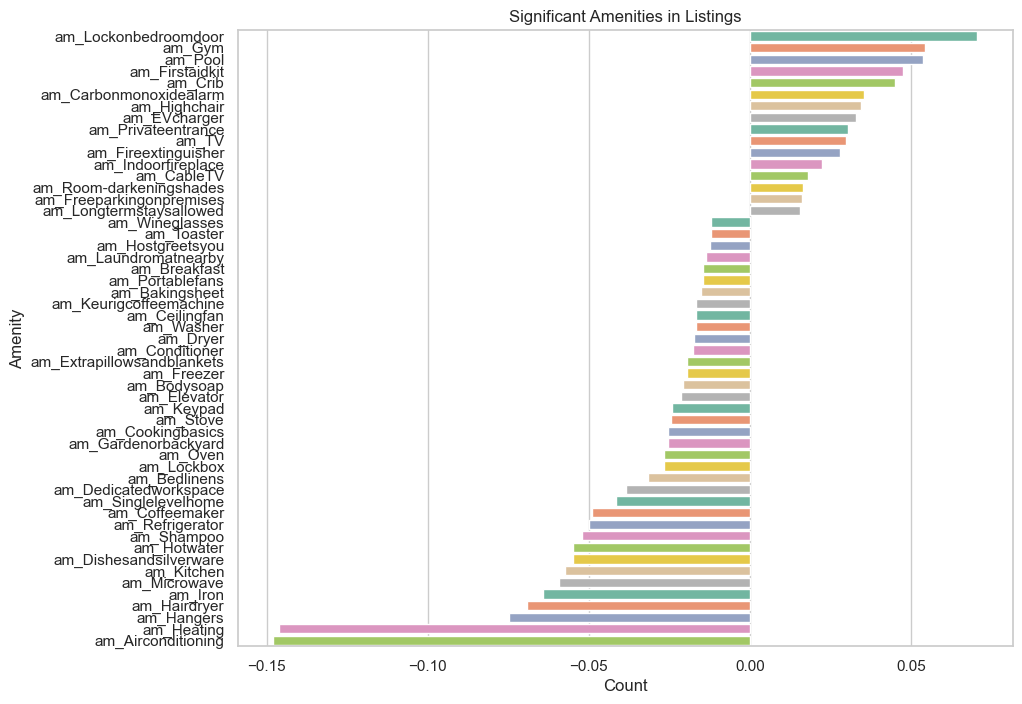

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# If `significant_amenities` is a Series, convert it to a DataFrame
significant_amenities_df = significant_amenities.reset_index()
significant_amenities_df.columns = ['Amenity', 'Count']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
chart = sns.barplot(
    x='Count',
    y='Amenity',
    data=significant_amenities_df.sort_values('Count', ascending=False),
    palette='Set2'
)
chart.set_title('Significant Amenities in Listings')
plt.show()


In [14]:
# Define the target variable 'y' using the 'price' column
y = df_listings['price']

# List of additional significant features to include
additional_features = ['cal_price','accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']

# Combine significant amenities and additional features
# Ensure that the significant_amenities index (which contains column names) is converted to a list for concatenation
features_to_include = list(significant_amenities.index) + additional_features

# Create the feature matrix 'X' by selecting the significant amenities and additional features from the DataFrame
# Note: This assumes all these columns are present in df_listing_reviews DataFrame
X = df_listings[features_to_include]

# Quick check on the shape of y and X to ensure they have the correct dimensions
print(f"Shape of Target (y): {y.shape}")
print(f"Shape of Features (X): {X.shape}")

X.info(verbose=True, show_counts=True)

Shape of Target (y): (186972,)
Shape of Features (X): (186972, 61)
<class 'pandas.core.frame.DataFrame'>
Index: 186972 entries, 1006826 to 764449
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   am_Heating                  186972 non-null  int64  
 1   am_Airconditioning          186972 non-null  int64  
 2   am_TV                       186972 non-null  int64  
 3   am_Hairdryer                186972 non-null  int64  
 4   am_Iron                     186972 non-null  int64  
 5   am_Hangers                  186972 non-null  int64  
 6   am_Kitchen                  186972 non-null  int64  
 7   am_Longtermstaysallowed     186972 non-null  int64  
 8   am_Shampoo                  186972 non-null  int64  
 9   am_Freeparkingonpremises    186972 non-null  int64  
 10  am_Coffeemaker              186972 non-null  int64  
 11  am_Dryer                    186972 non-null  int64  
 12  am_W

In [15]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Display the shapes of the training and test datasets to confirm the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(130880, 61) (56092, 61) (130880,) (56092,)


#### Finding the optimal alpha value for Lasso

In [16]:
from sklearn.linear_model import LassoCV

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LassoCV to find the optimal alpha
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)

lasso_cv.fit(X_train, y_train)

# The best alpha value after cross-validation
optimal_alpha = lasso_cv.alpha_
print(f"The optimal alpha value is: {optimal_alpha}")

# Now you can train a Lasso model with this optimal alpha
lasso_optimal = Lasso(alpha=optimal_alpha)
lasso_optimal.fit(X_train, y_train)

# You might want to check how this model performs on the test set


The optimal alpha value is: 0.7885303276241198


Lasso(alpha=0.7885303276241198)

In [17]:

# Initialize Lasso Regression with a pipeline including data scaling
lasso = Lasso(alpha=0.7885303276241198, fit_intercept=True, max_iter=3000)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso', lasso)  # Apply Lasso Regression
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Display R^2 score for both training and testing sets
print("Training R²:", pipe.score(X_train, y_train))
print("Testing R²:", pipe.score(X_test, y_test))


Training R²: 0.9387128640153221
Testing R²: 0.9241650142102377


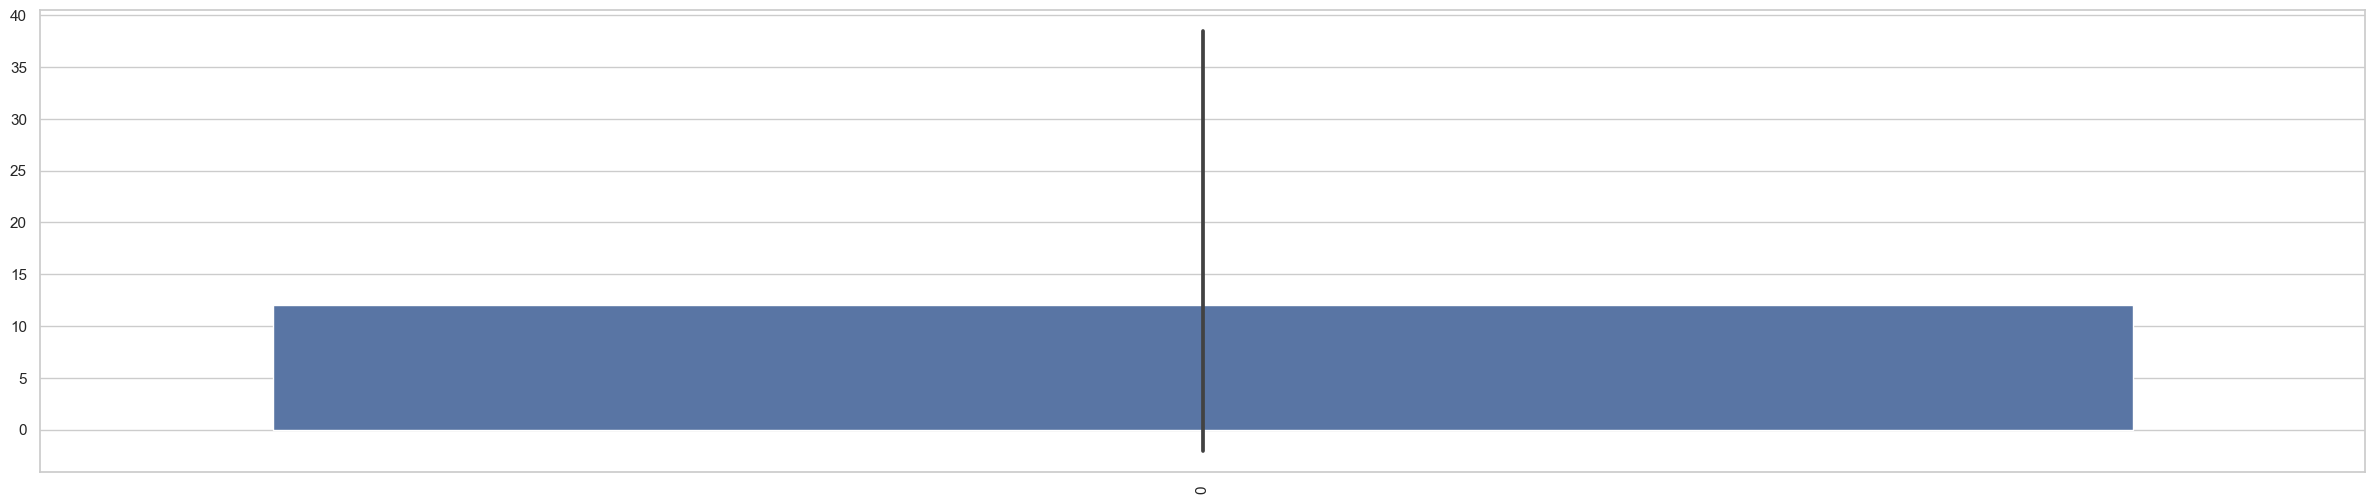

In [18]:
# Create a list of the columns from X (features)
feature_names = X.columns

# Extract Lasso coefficients
lasso_coef = pipe.named_steps['lasso'].coef_

# Plot the Lasso coefficients
plt.figure(figsize=(30,6))
sns.barplot(lasso_coef)  # Ensure feature_names are defined earlier
plt.xticks(rotation=90)
plt.show()


In [19]:
# Create feature_names that defined as the columns of X
feature_names = X.columns.tolist()

# Identify significant features
significant_features = [feature for feature, coef in zip(X.columns, lasso.coef_) if coef != 0]

print("Significant features based on Lasso:", significant_features)


Significant features based on Lasso: ['am_Heating', 'am_Airconditioning', 'am_TV', 'am_Hairdryer', 'am_Iron', 'am_Longtermstaysallowed', 'am_Shampoo', 'am_Freeparkingonpremises', 'am_Coffeemaker', 'am_Dryer', 'am_Hotwater', 'am_Carbonmonoxidealarm', 'am_Dedicatedworkspace', 'am_Fireextinguisher', 'am_Dishesandsilverware', 'am_Cookingbasics', 'am_Oven', 'am_Privateentrance', 'am_Stove', 'am_Bedlinens', 'am_Firstaidkit', 'am_Extrapillowsandblankets', 'am_Keypad', 'am_Gardenorbackyard', 'am_Pool', 'am_Gym', 'am_Bakingsheet', 'am_Elevator', 'am_Indoorfireplace', 'am_Room-darkeningshades', 'am_Singlelevelhome', 'am_Lockbox', 'am_Breakfast', 'am_Ceilingfan', 'am_Lockonbedroomdoor', 'am_Highchair', 'am_Keurigcoffeemachine', 'am_Wineglasses', 'am_EVcharger', 'am_Portablefans', 'am_Crib', 'am_Hostgreetsyou', 'cal_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating']


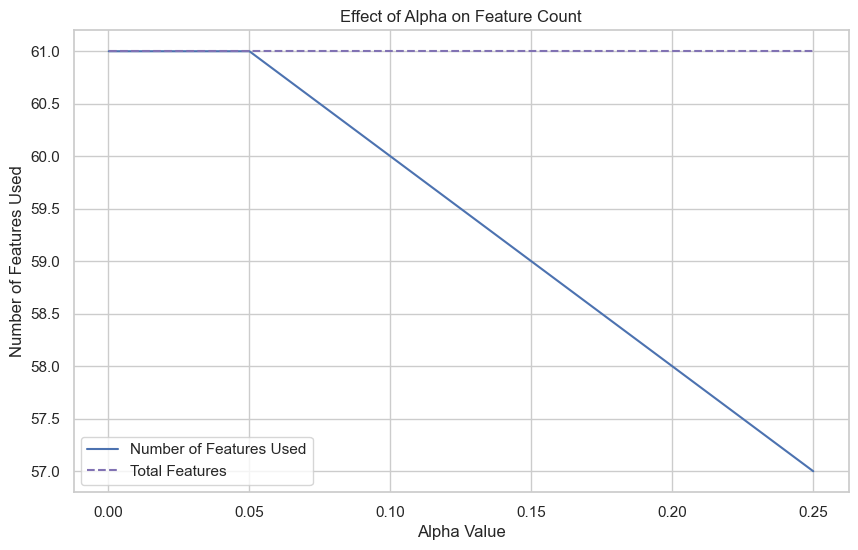

In [20]:
alpha_values = [.0001,.001, 0.005, 0.01, 0.05, 0.1, 0.25]
feature_counts = []
training_scores = []
testing_scores = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, fit_intercept=True, max_iter=3000)
    lasso_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', lasso_model)
    ])
    lasso_pipeline.fit(X_train, y_train)
    
    lasso_coef = lasso_pipeline.named_steps['lasso'].coef_ != 0
    feature_counts.append(np.sum(lasso_coef))
    training_scores.append(lasso_pipeline.score(X_train, y_train))
    testing_scores.append(lasso_pipeline.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, feature_counts, label='Number of Features Used')
plt.plot(alpha_values, [X.shape[1]] * len(alpha_values), 'm--', label='Total Features')
plt.xlabel('Alpha Value')
plt.ylabel('Number of Features Used')
plt.title('Effect of Alpha on Feature Count')
plt.legend()
plt.show()


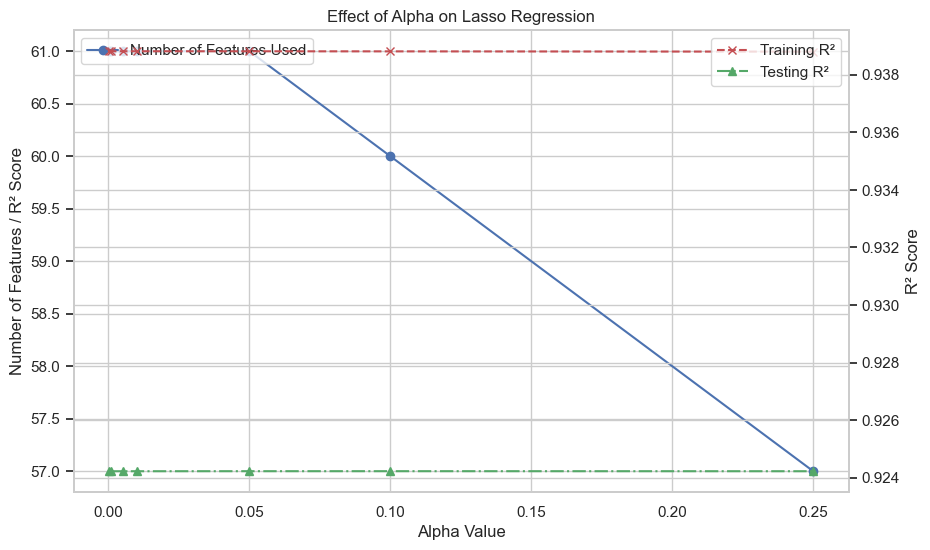

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, feature_counts, label='Number of Features Used', marker='o')
plt.xlabel('Alpha Value')
plt.ylabel('Number of Features / R² Score')
plt.title('Effect of Alpha on Lasso Regression')
plt.legend(loc='upper left')

# Create another y-axis for the R² scores
ax2 = plt.twinx()
ax2.plot(alpha_values, training_scores, 'r--', label='Training R²', marker='x')
ax2.plot(alpha_values, testing_scores, 'g-.', label='Testing R²', marker='^')
ax2.set_ylabel('R² Score')
ax2.legend(loc='upper right')
plt.show()


In [22]:
# This step should ideally be inside the loop if you want to track significant features for each alpha value.
# For the last model in the loop:
lasso_significant_features = [feature_names[i] for i in range(len(lasso_coef)) if lasso_pipeline.named_steps['lasso'].coef_[i] != 0]

# print significant features for the last alpha value used
print("Significant features for the last alpha value:", lasso_significant_features)

Significant features for the last alpha value: ['am_Heating', 'am_Airconditioning', 'am_TV', 'am_Hairdryer', 'am_Iron', 'am_Hangers', 'am_Longtermstaysallowed', 'am_Shampoo', 'am_Freeparkingonpremises', 'am_Coffeemaker', 'am_Dryer', 'am_Hotwater', 'am_Carbonmonoxidealarm', 'am_Dedicatedworkspace', 'am_Refrigerator', 'am_Fireextinguisher', 'am_Dishesandsilverware', 'am_Cookingbasics', 'am_Oven', 'am_Privateentrance', 'am_Stove', 'am_Bedlinens', 'am_Firstaidkit', 'am_Extrapillowsandblankets', 'am_CableTV', 'am_Keypad', 'am_Gardenorbackyard', 'am_Pool', 'am_Gym', 'am_Bakingsheet', 'am_Elevator', 'am_Indoorfireplace', 'am_Room-darkeningshades', 'am_Singlelevelhome', 'am_Lockbox', 'am_Freezer', 'am_Bodysoap', 'am_Breakfast', 'am_Ceilingfan', 'am_Conditioner', 'am_Lockonbedroomdoor', 'am_Highchair', 'am_Keurigcoffeemachine', 'am_Wineglasses', 'am_EVcharger', 'am_Portablefans', 'am_Crib', 'am_Laundromatnearby', 'am_Hostgreetsyou', 'cal_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 

In [23]:
import pandas as pd

# Predicting with the Lasso model
lasso_pred = lasso_pipeline.predict(X_test)

# Convert predictions into a DataFrame
df_lasso_pred = pd.DataFrame(lasso_pred, columns=['Lasso Predictions'])

# Display the first few rows of the predictions DataFrame
print(df_lasso_pred.head())


   Lasso Predictions
0          97.875478
1         277.299018
2         324.267592
3          98.065946
4         327.651047


In [24]:
# Calculate the R² score for the Lasso model
lasso.score(X_test, y_test)

0.9237973665717318

## Ridge Regression

In [25]:
# Initialize Ridge Regression with a small alpha value as a starting point.
ridge = Ridge(alpha=0.02, fit_intercept=True, max_iter=3000)

# Create a pipeline with feature scaling and Ridge Regression
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', ridge)
])

# Fit the pipeline to the training data
pipe_ridge.fit(X_train, y_train)

# Evaluate the model on both the training and test sets
print("Training set score:", pipe_ridge.score(X_train, y_train))
print("Test set score:", pipe_ridge.score(X_test, y_test))


Training set score: 0.938813804123584
Test set score: 0.9242284676499435


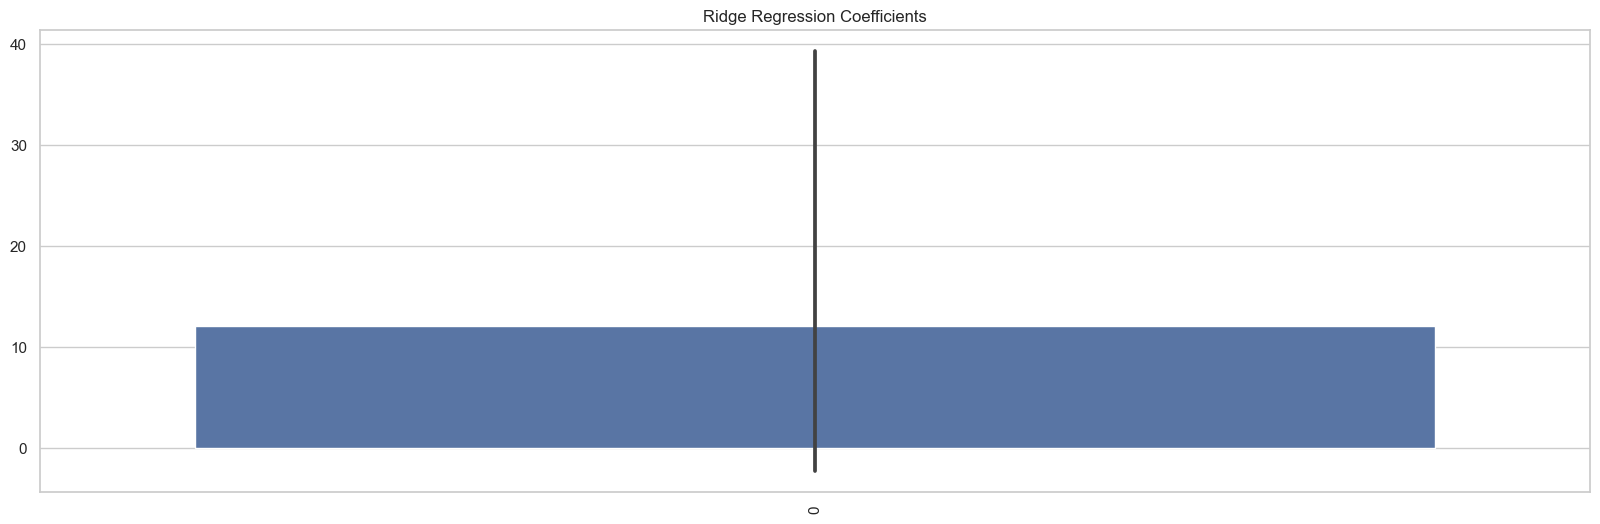

In [26]:
ridge_coef = pipe_ridge.named_steps['ridge'].coef_

plt.figure(figsize=(20,6))
sns.barplot(ridge_coef) 
plt.xticks(rotation=90)
plt.title('Ridge Regression Coefficients')
plt.show()


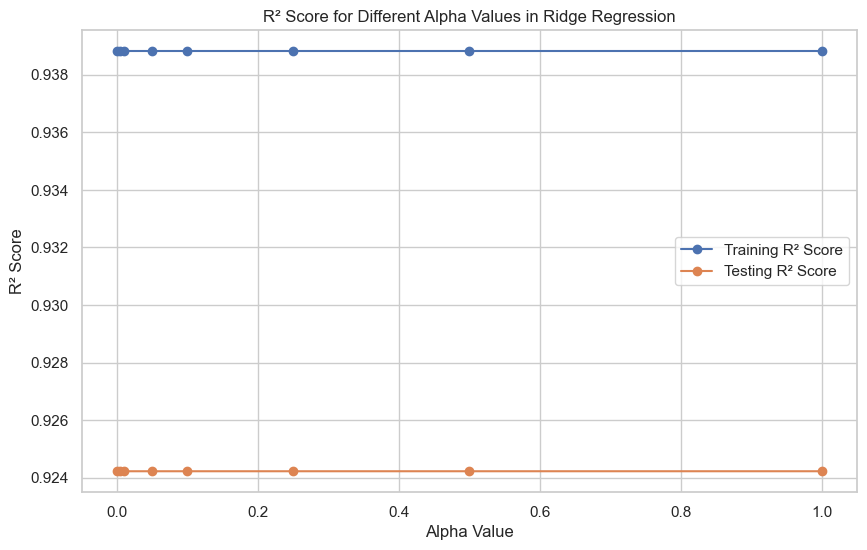

In [27]:
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 1]
ridge_scores_train = []
ridge_scores_test = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha, fit_intercept=True, max_iter=3000)
    pipeline_ridge = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', ridge_model)
    ])
    pipeline_ridge.fit(X_train, y_train)
    ridge_scores_train.append(pipeline_ridge.score(X_train, y_train))
    ridge_scores_test.append(pipeline_ridge.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(alpha_values, ridge_scores_train, label='Training R² Score', marker='o')
plt.plot(alpha_values, ridge_scores_test, label='Testing R² Score', marker='o')
plt.xlabel('Alpha Value')
plt.ylabel('R² Score')
plt.title('R² Score for Different Alpha Values in Ridge Regression')
plt.legend()
plt.show()


In [28]:
best_alpha = alpha_values[np.argmax(ridge_scores_test)]
best_ridge_model = Ridge(alpha=best_alpha, fit_intercept=True, max_iter=3000)
pipeline_ridge_best = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', best_ridge_model)
])
pipeline_ridge_best.fit(X_train, y_train)
ridge_predictions = pipeline_ridge_best.predict(X_test)

# Store the Ridge Regression predicted values in a DataFrame
df_ridge_predictions = pd.DataFrame(ridge_predictions, columns=['ridge_predictions'])

# Use y_test as your actual target variable
df_actual_target = pd.DataFrame(y_test).reset_index(drop=True)

# Concatenate the actual and predicted values for comparison
df_ridge_results = pd.concat([df_actual_target, df_ridge_predictions], axis=1)

# Use 'price' as your actual target variable
df_ridge_results['ridge_resid'] = df_ridge_results['price'] - df_ridge_results['ridge_predictions']

# Display the DataFrame with actual, predicted, and residual values
df_ridge_results.head()


,price,ridge_predictions,ridge_resid
0,75.0,101.682877,-26.682877
1,395.0,276.363415,118.636585
2,295.0,325.665202,-30.665202
3,83.0,96.406900,-13.406900
4,350.0,329.853926,20.146074


### 

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Define quantile levels for prediction intervals
LOWER_ALPHA = 0.025
UPPER_ALPHA = 0.975

# Initialize models for the prediction intervals
lower_model = GradientBoostingRegressor(loss="quantile", alpha=LOWER_ALPHA)
upper_model = GradientBoostingRegressor(loss="quantile", alpha=UPPER_ALPHA)

# Fit models to the training data to create the prediction intervals
lower_bound = lower_model.fit(X_train, y_train)
upper_bound = upper_model.fit(X_train, y_train)

# Prepare DataFrame to hold actual, predicted, and interval data
df_predictions = pd.DataFrame(y_test).reset_index(drop=True)
df_predictions.columns = ['Actual Price'] 

# Generate and store lower and upper interval predictions
df_predictions['Lower Prediction Interval'] = lower_bound.predict(X_test)
df_predictions['Upper Prediction Interval'] = upper_bound.predict(X_test)


In [30]:
# Concatenate actual target, prediction, and interval data into one DataFrame
df_results = pd.concat([
    df_predictions,
    df_ridge_predictions.rename(columns={'ridge_predictions': 'Ridge Predicted'}),
    df_lasso_pred.rename(columns={'Lasso Predictions': 'Lasso Predicted'}),
], axis=1)

# Calculate residuals for each model
df_results['Ridge Residuals'] = df_results['Actual Price'] - df_results['Ridge Predicted']
df_results['Lasso Residuals'] = df_results['Actual Price'] - df_results['Lasso Predicted']

# Verify the DataFrame structure
df_results.head()

,Actual Price,Lower Prediction Interval,Upper Prediction Interval,Ridge Predicted,Lasso Predicted,Ridge Residuals,Lasso Residuals
0,75.0,52.626086,139.286941,101.682877,97.875478,-26.682877,-22.875478
1,395.0,115.288968,528.417348,276.363415,277.299018,118.636585,117.700982
2,295.0,67.636088,465.938403,325.665202,324.267592,-30.665202,-29.267592
3,83.0,60.411245,186.540463,96.406900,98.065946,-13.406900,-15.065946
4,350.0,117.502273,481.491843,329.853926,327.651047,20.146074,22.348953


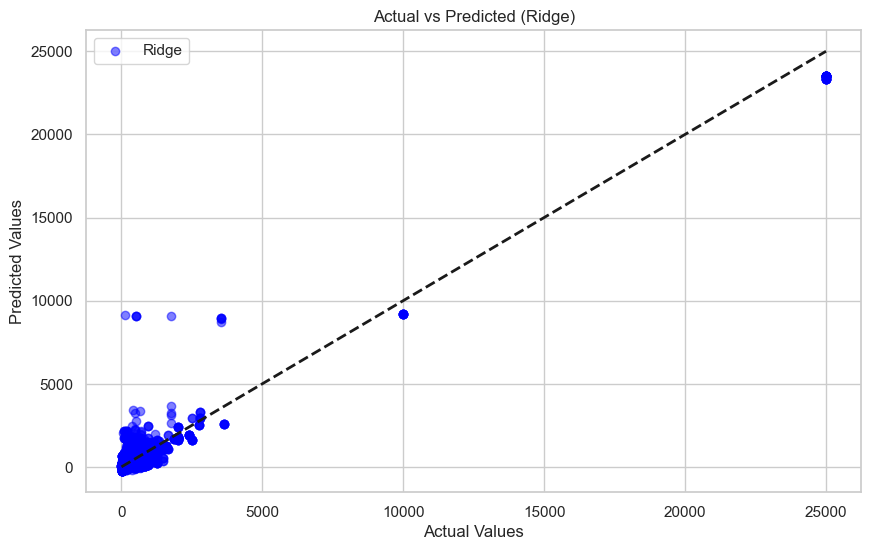

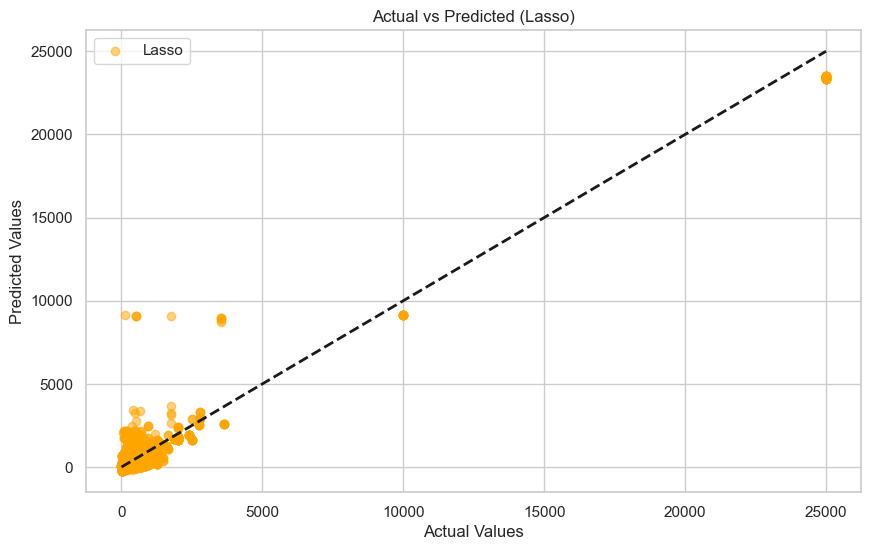

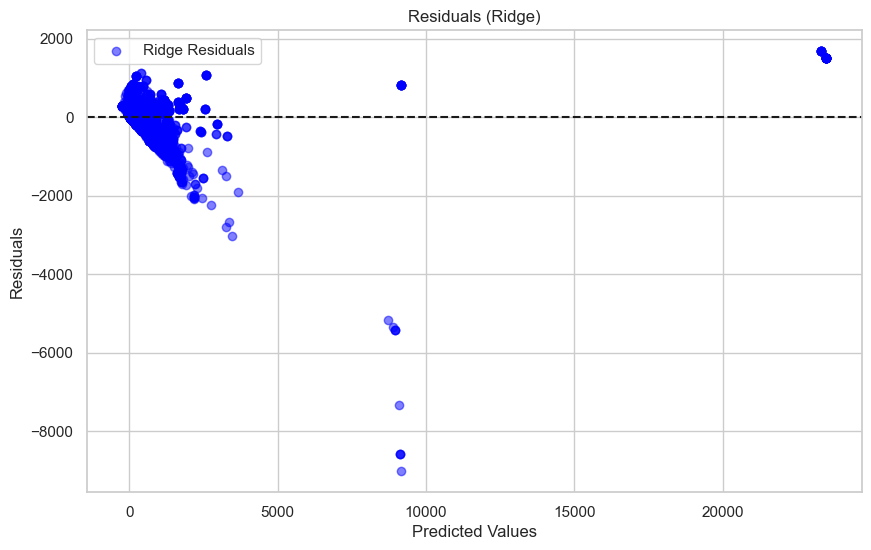

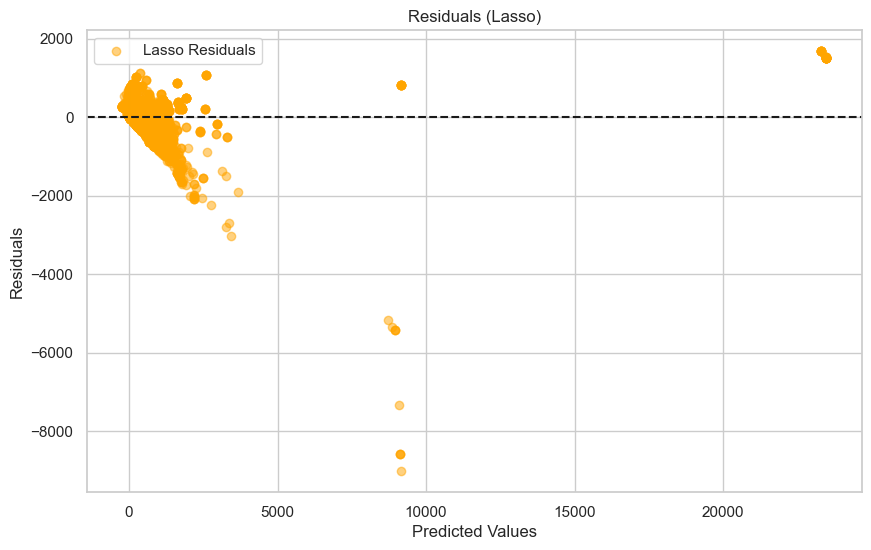

In [31]:
import matplotlib.pyplot as plt

# Function for creating scatter plots for actual vs. predicted values
def plot_actual_vs_predicted(df, actual_col, predicted_col, model_name, color):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[actual_col], df[predicted_col], alpha=0.5, color=color, label=model_name)
    plt.plot([df[actual_col].min(), df[actual_col].max()], [df[actual_col].min(), df[actual_col].max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted ({model_name})')
    plt.legend()
    plt.show()

# Function for creating residual plots
def plot_residuals(df, predicted_col, residual_col, model_name, color):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[predicted_col], df[residual_col], alpha=0.5, color=color, label=model_name + ' Residuals')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals ({model_name})')
    plt.legend()
    plt.show()

# Create scatter and residual plots for Ridge and Lasso models
plot_actual_vs_predicted(df_results, 'Actual Price', 'Ridge Predicted', 'Ridge', 'blue')
plot_actual_vs_predicted(df_results, 'Actual Price', 'Lasso Predicted', 'Lasso', 'orange')

plot_residuals(df_results, 'Ridge Predicted', 'Ridge Residuals', 'Ridge', 'blue')
plot_residuals(df_results, 'Lasso Predicted', 'Lasso Residuals', 'Lasso', 'orange')


#### Conclusion
Your analysis suggests that both models predict the price from the features quite well, ***but Lasso has the added benefit of feature selection***. The optimal alpha for Lasso leads to high R² scores, indicating good model performance. For Ridge, the performance is stable across alpha values, and it might be more about choosing an alpha that minimizes complexity without sacrificing too much accuracy.

The optimal alpha for Lasso was about 0.79, with a training R² of 0.939 and a testing R² of 0.924, which suggests the model explains a lot of variability in the data and predicts the price reasonably well. The Ridge regression seems to have a consistent R² across different alpha values, which indicates its predictions are stable across different levels of regularization

Your actual vs. predicted plots for both Ridge and Lasso show how close the predicted values are to the actual ones, with the closer the points are to the diagonal line, the better. The residuals plot also shows this — the closer the residuals are to zero, the better your model's predictions.

The ***Lasso Regression Model*** is like a detective that picks out clues about what makes an Airbnb listing's price tick. It looks at all the little extras, from air conditioning to kitchen gadgets, and figures out which ones actually nudge the price up or down. This plot shows us the big winners and losers in the amenities game. For example, some amenities like air conditioning and heating seem to be pretty important for a listing's price. This kind of info is super handy for InsideAirbnb.com because it helps users quickly spot what features to highlight or look for, making the platform's price predictions smarter and more useful.

###

## Label Prediction Model (Classification Analysis):

* Objective: Predicts a category (label) that each observation belongs to based on input variables. The labels are discrete and usually finite. For instance, predicting whether an Airbnb listing will be highly rated or not based on features like accommodations, number of bedrooms, etc.
* Example Models: Logistic Regression are suitable for this task. Random Forest can handle non-linear relationships well, Logistic Regression is efficient for binary classification problems.
* Target Variable: A categorical variable, such as 'HighlyRated' vs. 'NotHighlyRated'

### Using Logistic Regression create a model


In [32]:
# Function to categorize review scores
def categorize_review_score(rating):
    if rating >= 97:
        return 1  # Highly Rated
    else:
        return 0  # Not Highly Rated

# Apply the function to create a new binary outcome column
df_listings['Highly_Rated'] = df_listings['review_scores_rating'].apply(categorize_review_score)

In [33]:
df_listings['Highly_Rated'].value_counts(normalize=True)

Highly_Rated
1    0.686146
0    0.313854
Name: proportion, dtype: float64

In [34]:
# x and y variables
X = df_listings.drop(['review_scores_rating', 'Highly_Rated'], axis=1)  
y = df_listings['Highly_Rated']

In [35]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=21, max_iter=1000)

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the target variable with the test data
model_pred = model.predict(X_test)
model_prob = model.predict_proba(X_test)


In [37]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=21)

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the target variable with the test data
model_pred = model.predict(X_test)
model_prob = model.predict_proba(X_test)

# Print a sample of predictions and probabilities
print(model_pred[:5])
print(model_prob[:5])

[1 1 1 1 1]
[[0.3251078  0.6748922 ]
 [0.34186495 0.65813505]
 [0.27011371 0.72988629]
 [0.33079793 0.66920207]
 [0.28880876 0.71119124]]


In [38]:
# Assuming model_pred contains binary predictions (0 or 1) and model_prob contains probabilities for each class
model_pred_df = pd.DataFrame(model_pred, columns=['Predict_HighlyRated'])
model_prob_df = pd.DataFrame(model_prob, columns=['Prob_NotHighlyRated', 'Prob_HighlyRated'])

# Sample of predictions and probabilities
display(model_pred_df.sample(5, random_state=244))
display(model_prob_df.sample(5, random_state=244))


,Predict_HighlyRated
15956,1
29561,1
6702,1
14210,1
14091,1


,Prob_NotHighlyRated,Prob_HighlyRated
15956,0.234808,0.765192
29561,0.213938,0.786062
6702,0.224029,0.775971
14210,0.475343,0.524657
14091,0.238705,0.761295


In [39]:
# Generate and display classification report
print("Classification Report:")
print(classification_report(y_test, model_pred, target_names=['Prob_NotHighlyRated', 'Prob_HighlyRated']))

Classification Report:
                     precision    recall  f1-score   support

Prob_NotHighlyRated       0.90      0.01      0.02     11735
   Prob_HighlyRated       0.69      1.00      0.82     25660

           accuracy                           0.69     37395
          macro avg       0.79      0.50      0.42     37395
       weighted avg       0.75      0.69      0.57     37395



In [40]:
# Assuming X_test includes your features and you want to include some of them in the combined results DataFrame
relevant_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews'] 

# Reset the index of y_test to easily concatenate with predictions
y_test_reset = y_test.reset_index(drop=True)

# Combine relevant columns from X_test, y_test, predictions, and probabilities
df_model_results = pd.concat([X_test[relevant_features].reset_index(drop=True), 
                              y_test_reset.rename('Actual_HighlyRated'), model_pred_df, model_prob_df], axis=1)

# Display a sample of the combined DataFrame
display(df_model_results.sample(10, random_state=244))


,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,Actual_HighlyRated,Predict_HighlyRated,Prob_NotHighlyRated,Prob_HighlyRated
15956,12,2.5,4.0,5.0,2,24,1,1,0.234808,0.765192
29561,2,1.0,1.0,1.0,2,49,1,1,0.213938,0.786062
6702,2,1.0,1.0,1.0,1,640,1,1,0.224029,0.775971
14210,6,2.0,2.0,3.0,1,2,0,1,0.475343,0.524657
14091,10,3.5,3.0,4.0,2,55,0,1,0.238705,0.761295
18610,4,2.0,2.0,3.0,1,31,1,1,0.350034,0.649966
27577,2,1.0,1.0,1.0,1,2,0,1,0.414036,0.585964
36715,2,1.0,1.0,1.0,1,8,0,1,0.335180,0.664820
6440,4,1.0,1.0,2.0,3,1,1,1,0.383417,0.616583
12372,6,2.0,2.0,2.0,1,75,1,1,0.322481,0.677519


Accuracy Score: 0.6888621473459019
Confusion Matrix:
[[  113 11622]
 [   13 25647]]


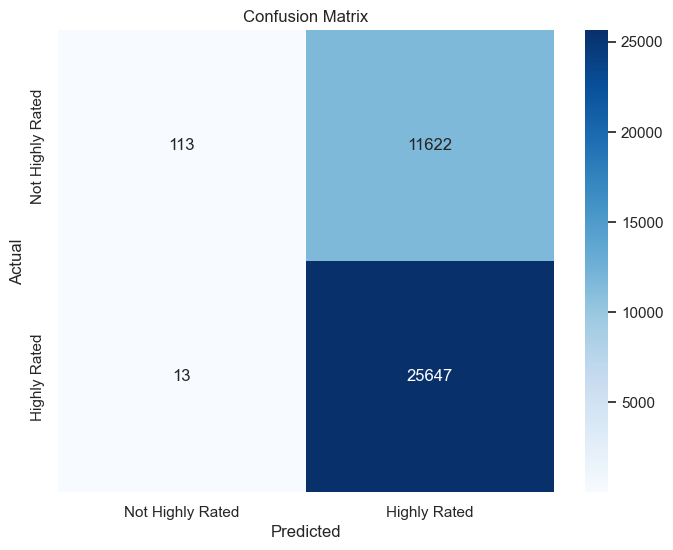

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, model_pred)
print(f"Accuracy Score: {accuracy}")

# Generate and display a confusion matrix
conf_matrix = confusion_matrix(y_test, model_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Highly Rated', 'Highly Rated'], yticklabels=['Not Highly Rated', 'Highly Rated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
                  precision    recall  f1-score   support

Not Highly Rated       0.90      0.01      0.02     11735
    Highly Rated       0.69      1.00      0.82     25660

        accuracy                           0.69     37395
       macro avg       0.79      0.50      0.42     37395
    weighted avg       0.75      0.69      0.57     37395



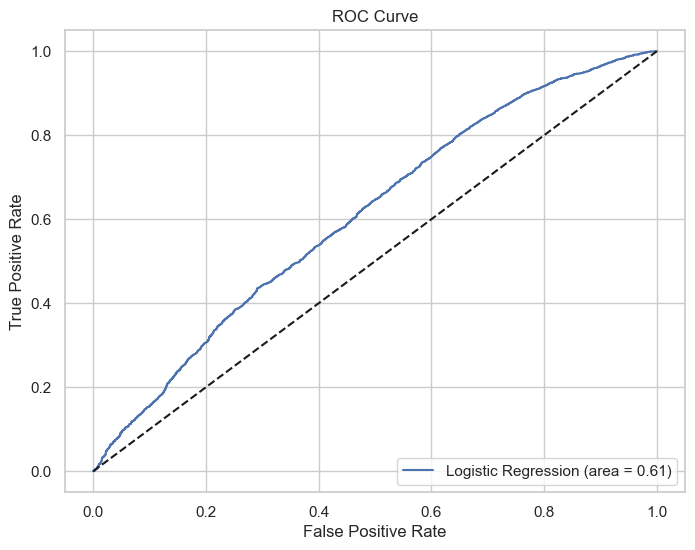

ROC AUC Score: 0.6084082065594426


In [42]:
# Generate and display classification report
print("Classification Report:")
print(classification_report(y_test, model_pred, target_names=['Not Highly Rated', 'Highly Rated']))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, model_prob[:, 1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Display ROC AUC Score
roc_auc = roc_auc_score(y_test, model_prob[:, 1])
print(f"ROC AUC Score: {roc_auc}")

In [43]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
mm = preprocessing.MinMaxScaler()
rb = preprocessing.RobustScaler()
nm = preprocessing.Normalizer()
# Fit and transform the training data
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

# Transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

# Fit and transform the training data
mm.fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)

# Transform the test data
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)

# Fit and transform the training data
rb.fit(X_train)
X_train_rb = rb.transform(X_train)
X_train_rb = pd.DataFrame(X_train_rb, columns=X_train.columns)

# Transform the test data
X_test_rb = rb.transform(X_test)
X_test_rb = pd.DataFrame(X_test_rb, columns=X_test.columns)

# Fit and transform the training data
nm.fit(X_train)
X_train_nm = nm.transform(X_train)
X_train_nm = pd.DataFrame(X_train_nm, columns=X_train.columns)

# Transform the test data
X_test_nm = nm.transform(X_test)
X_test_nm = pd.DataFrame(X_test_nm, columns=X_test.columns)

In [44]:
# Initialize Logistic Regression model
model = LogisticRegression(random_state=21)

# DataFrame to aggregate results
df_results_scaled = pd.DataFrame(index=y_test.index)  # Ensure alignment with y_test

# Tuple of datasets for iteration
scale = [
    (X_train, X_test, 'Raw'),
    (X_train_sc, X_test_sc, 'StdScale'),
    (X_train_mm, X_test_mm, 'MinMax'),
    (X_train_rb, X_test_rb, 'Robust'),
    (X_train_nm, X_test_nm, 'Normal')
]

# Iterate over each dataset, train, predict, and compile results
for var_train, var_test, name in scale:
    model.fit(var_train, y_train)
    score = model.score(var_test, y_test)
    model_pred = model.predict(var_test)
    df_model_pred = pd.DataFrame(model_pred, columns=[f'{name}_Predict'])
    
    df_results_scaled = pd.concat([df_results_scaled, df_model_pred], axis=1)
    
    print(f'----------------\nResults: {name}')
    print(f'Score: {round(score, 6)}')
    print(confusion_matrix(y_test, model_pred))

----------------
Results: Raw
Score: 0.688862
[[  113 11622]
 [   13 25647]]
----------------
Results: StdScale
Score: 0.852306
[[ 7771  3964]
 [ 1559 24101]]


----------------
Results: MinMax
Score: 0.850648
[[ 7660  4075]
 [ 1510 24150]]
----------------
Results: Robust
Score: 0.853376
[[ 7786  3949]
 [ 1534 24126]]
----------------
Results: Normal
Score: 0.689959
[[  674 11061]
 [  533 25127]]


In [45]:
def model_train_test(var_train, var_test, y_train, y_test, model):
    # Fit the model
    model.fit(var_train, y_train)

    # Predict with the model
    model_pred = model.predict(var_test)
    model_prob = model.predict_proba(var_test)

    # Assess the model
    score = model.score(var_test, y_test)

    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")


    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")


    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')

    # ROC AUC Score and Chart
    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob))

    # Cross-validation
    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_accuracy = cross_val_score(model, var_train, y_train, cv=5, scoring='accuracy')
    cv_roc_auc = cross_val_score(model, var_train, y_train, cv=5, scoring='roc_auc')
    print('CV Accuracy Scores:', cv_accuracy)
    print('CV ROC AUC:', cv_roc_auc)

    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    print('')

Standard Scaler Results:


XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.852306

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[ 7771  3964]
 [ 1559 24101]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.83      0.66      0.74     11735
           1       0.86      0.94      0.90     25660

    accuracy                           0.85     37395
   macro avg       0.85      0.80      0.82     37395
weighted avg       0.85      0.85      0.85     37395


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



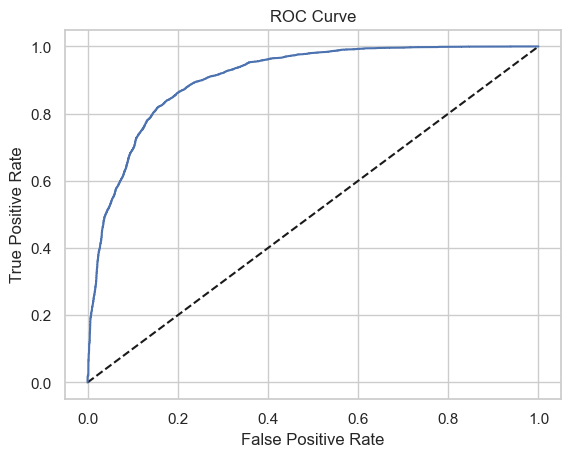

ROC AUC Score: 0.9071239913908105
XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores: [0.85800241 0.85649819 0.8520809  0.85428715 0.86040448]
CV ROC AUC: [0.90847886 0.90931139 0.9079919  0.90807089 0.91054542]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

MinMax Scaler Results:
XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.850648

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[ 7660  4075]
 [ 1510 24150]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.84      0.65      0.73     11735
           1       0.86      0.94      0.90     25660

    accuracy                           0.85     37395
   macro avg       0.85      0.80      0.81     37395
weighted avg       0.85      0.85      0.85     37395


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



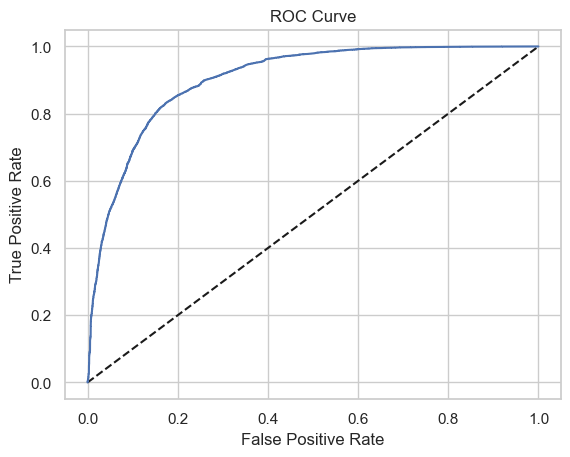

ROC AUC Score: 0.9034753741115257
XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores: [0.85709988 0.8540246  0.84870466 0.85044292 0.85916764]
CV ROC AUC: [0.90625612 0.90304852 0.90332905 0.90144112 0.90667845]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Robust Scaler Results:
XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.853376

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[ 7786  3949]
 [ 1534 24126]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     11735
           1       0.86      0.94      0.90     25660

    accuracy                           0.85     37395
   macro avg       0.85      0.80      0.82     37395
weighted avg       0.85      0.85      0.85     37395


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



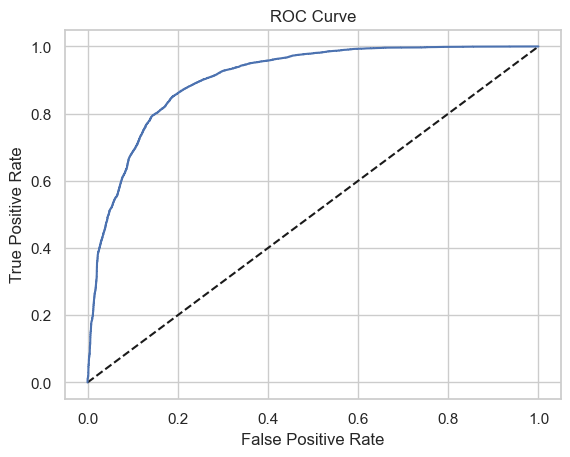

ROC AUC Score: 0.904447185691025
XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores: [0.85870437 0.85048135 0.85091091 0.85465486 0.8562594 ]
CV ROC AUC: [0.90399957 0.889545   0.90537905 0.90509147 0.90108524]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Normalizer Results:
XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.689959

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[  674 11061]
 [  533 25127]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.56      0.06      0.10     11735
           1       0.69      0.98      0.81     25660

    accuracy                           0.69     37395
   macro avg       0.63      0.52      0.46     37395
weighted avg       0.65      0.69      0.59     37395


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



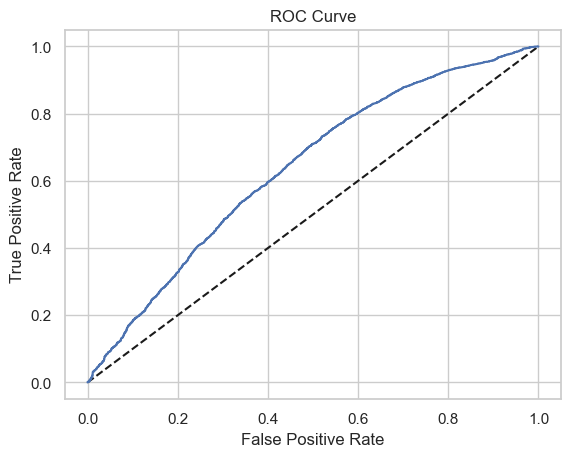

ROC AUC Score: 0.637464832138406
XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores: [0.68839417 0.68832732 0.6889186  0.68875146 0.68888517]
CV ROC AUC: [0.63234085 0.64120018 0.64006664 0.64173545 0.64071418]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX



In [46]:
# Standard Scaler
print('Standard Scaler Results:')
model_train_test(X_train_sc, X_test_sc, y_train, y_test, LogisticRegression(random_state=21))

# MinMax Scaler
print('MinMax Scaler Results:')
model_train_test(X_train_mm, X_test_mm, y_train, y_test, LogisticRegression(random_state=21))

# Robust Scaler
print('Robust Scaler Results:')
model_train_test(X_train_rb, X_test_rb, y_train, y_test, LogisticRegression(random_state=21))

# Normalizer
print('Normalizer Results:')
model_train_test(X_train_nm, X_test_nm, y_train, y_test, LogisticRegression(random_state=21))


In [47]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score

def short_train_test(var_train, var_test, y_train, y_test, model):
    # Fit the model
    model.fit(var_train, y_train)

    # Predict with the model
    model_pred = model.predict(var_test)
    model_prob = model.predict_proba(var_test)

    # Print evaluation metrics
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, model_pred))
    print('Accuracy Score:', '{:.4f}'.format(model.score(var_test, y_test)))
    print('Recall Score:', '{:.4f}'.format(recall_score(y_test, model_pred)))
    print('Precision Score:', '{:.4f}'.format(precision_score(y_test, model_pred)))
    print('ROC AUC Score:', '{:.4f}'.format(roc_auc_score(y_test, model_prob[:, 1])))
    print('')


In [48]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=21)

# Evaluate Standard Scaled Data
print('Standard Scaled Data:')
short_train_test(X_train_sc, X_test_sc, y_train, y_test, model)

# Evaluate MinMax Scaled Data
print('MinMax Scaled Data:')
short_train_test(X_train_mm, X_test_mm, y_train, y_test, model)

# Evaluate Robust Scaled Data
print('Robust Scaled Data:')
short_train_test(X_train_rb, X_test_rb, y_train, y_test, model)

# Evaluate Normalized Scaled Data
print('Normalized Scaled Data:')
short_train_test(X_train_nm, X_test_nm, y_train, y_test, model)

Standard Scaled Data:


Confusion Matrix:
[[ 7771  3964]
 [ 1559 24101]]
Accuracy Score: 0.8523
Recall Score: 0.9392
Precision Score: 0.8588
ROC AUC Score: 0.9071

MinMax Scaled Data:
Confusion Matrix:
[[ 7660  4075]
 [ 1510 24150]]
Accuracy Score: 0.8506
Recall Score: 0.9412
Precision Score: 0.8556
ROC AUC Score: 0.9035

Robust Scaled Data:
Confusion Matrix:
[[ 7786  3949]
 [ 1534 24126]]
Accuracy Score: 0.8534
Recall Score: 0.9402
Precision Score: 0.8593
ROC AUC Score: 0.9044

Normalized Scaled Data:
Confusion Matrix:
[[  674 11061]
 [  533 25127]]
Accuracy Score: 0.6900
Recall Score: 0.9792
Precision Score: 0.6943
ROC AUC Score: 0.6375



In [49]:
# Initialize and assess the optimal Logistic Regression model
OPT_LR_model = LogisticRegression(C=0.001, penalty='l1', solver='liblinear', random_state=21)
short_train_test(X_train_rb, X_test_sc, y_train, y_test, OPT_LR_model)

# Predictions and probabilities
Pred_OPT_Log = OPT_LR_model.predict(X_test_sc)
Prob_OPT = OPT_LR_model.predict_proba(X_test_sc)

# Convert predictions and probabilities into DataFrames
Pred_OPT_Log_df = pd.DataFrame(Pred_OPT_Log, columns=['Pred_OPT_Log'])
Prob_OPT_df = pd.DataFrame(Prob_OPT, columns=['Not Highly Rated', 'Highly Rated'])

# Display samples of predictions and probabilities
display(Pred_OPT_Log_df.sample(5, random_state=244))
display(Prob_OPT_df.sample(5, random_state=244))


Confusion Matrix:
[[ 6165  5570]
 [  756 24904]]
Accuracy Score: 0.8308
Recall Score: 0.9705
Precision Score: 0.8172
ROC AUC Score: 0.8909



,Pred_OPT_Log
15956,1
29561,1
6702,1
14210,0
14091,1


,Not Highly Rated,Highly Rated
15956,0.026243,9.737570e-01
29561,0.029785,9.702147e-01
6702,0.028112,9.718881e-01
14210,1.000000,2.368319e-16
14091,0.021137,9.788632e-01


 Based on the comparison, Standard Scaled Data appears to be the best choice for the optimal model when considering a balance across all metrics. It shows the best ability to distinguish between classes (highest ROC AUC Score), while also maintaining high levels of accuracy, recall, and precision. This suggests it could offer a good balance between correctly identifying positive cases and minimizing false positives, making it a solid choice for many applications.

In [50]:
# Setting up the parameter grid
grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty": ["l1", "l2"], "solver": ['lbfgs', 'liblinear']}

# Initialize Logistic Regression and RandomizedSearchCV
logreg = LogisticRegression(random_state=21)
logreg_cv = RandomizedSearchCV(logreg, grid, cv=10)

# Fit RandomizedSearchCV using Robust Scaled data
logreg_cv.fit(X_train_rb, y_train)  # Ensure to use Robust Scaled data

# Display the best parameters and score
print("Tuned hyperparameters: (best parameters)", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters: (best parameters) {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Accuracy: 0.8577789806734201


In [51]:
# Create the hypertuned model based on identified parameters
model = LogisticRegression(C=logreg_cv.best_params_['C'], penalty=logreg_cv.best_params_['penalty'], solver=logreg_cv.best_params_['solver'])
# Evaluate the model using the Robust Scaled dat
short_train_test(X_train_rb, X_test_rb, y_train, y_test, model)

Confusion Matrix:
[[ 7810  3925]
 [ 1501 24159]]
Accuracy Score: 0.8549
Recall Score: 0.9415
Precision Score: 0.8602
ROC AUC Score: 0.9065



In [52]:
# List of class weights to try
cw = [None, {0:1, 1:1}, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:4.5}, {0:1, 1:5}, {0:1, 1:5.5}, {0:1, 1:10}, {0:1, 1:100}]

# Iterate through different class weights
for w in cw:
    print('Model with Class Weight:', w)
    model = LogisticRegression(C=logreg_cv.best_params_['C'], penalty=logreg_cv.best_params_['penalty'], solver=logreg_cv.best_params_['solver'], class_weight=w, random_state=21)
    short_train_test(X_train_sc, X_test_sc, y_train, y_test, model)
    print('----------------------')


Model with Class Weight: None


Confusion Matrix:
[[ 7775  3960]
 [ 1553 24107]]
Accuracy Score: 0.8526
Recall Score: 0.9395
Precision Score: 0.8589
ROC AUC Score: 0.9072

----------------------
Model with Class Weight: {0: 1, 1: 1}
Confusion Matrix:
[[ 7775  3960]
 [ 1553 24107]]
Accuracy Score: 0.8526
Recall Score: 0.9395
Precision Score: 0.8589
ROC AUC Score: 0.9072

----------------------
Model with Class Weight: balanced
Confusion Matrix:
[[ 9201  2534]
 [ 3150 22510]]
Accuracy Score: 0.8480
Recall Score: 0.8772
Precision Score: 0.8988
ROC AUC Score: 0.9094

----------------------
Model with Class Weight: {0: 1, 1: 1.5}
Confusion Matrix:
[[ 7097  4638]
 [  988 24672]]
Accuracy Score: 0.8496
Recall Score: 0.9615
Precision Score: 0.8418
ROC AUC Score: 0.9057

----------------------
Model with Class Weight: {0: 1, 1: 2}
Confusion Matrix:
[[ 6593  5142]
 [  715 24945]]
Accuracy Score: 0.8434
Recall Score: 0.9721
Precision Score: 0.8291
ROC AUC Score: 0.9046

----------------------
Model with Class Weight: {0: 1, 1: 

 The model without class weight or with {0: 1, 1: 1} seems optimal are the best, with an accuracy of 0.7642.

In [53]:
# Create the DECISION model with the chosen class weight
DEC_LR_model = LogisticRegression(C=0.001, penalty='l1', solver='liblinear', class_weight={0: 1, 1: 1})

# Evaluate the DECISION model
short_train_test(X_train_rb, X_test_mm, y_train, y_test, DEC_LR_model)

# Display predictions and probabilities
Pred_DEC_Log = DEC_LR_model.predict(X_test_rb)
Prob_DEC = DEC_LR_model.predict_proba(X_test_rb)

Confusion Matrix:
[[    0 11735]
 [    0 25660]]
Accuracy Score: 0.6862
Recall Score: 1.0000
Precision Score: 0.6862
ROC AUC Score: 0.8672



([<matplotlib.axis.YTick at 0x226942c4cd0>,
 [Text(0, 0.5, 'Good'), Text(0, 1.5, 'Bad')])

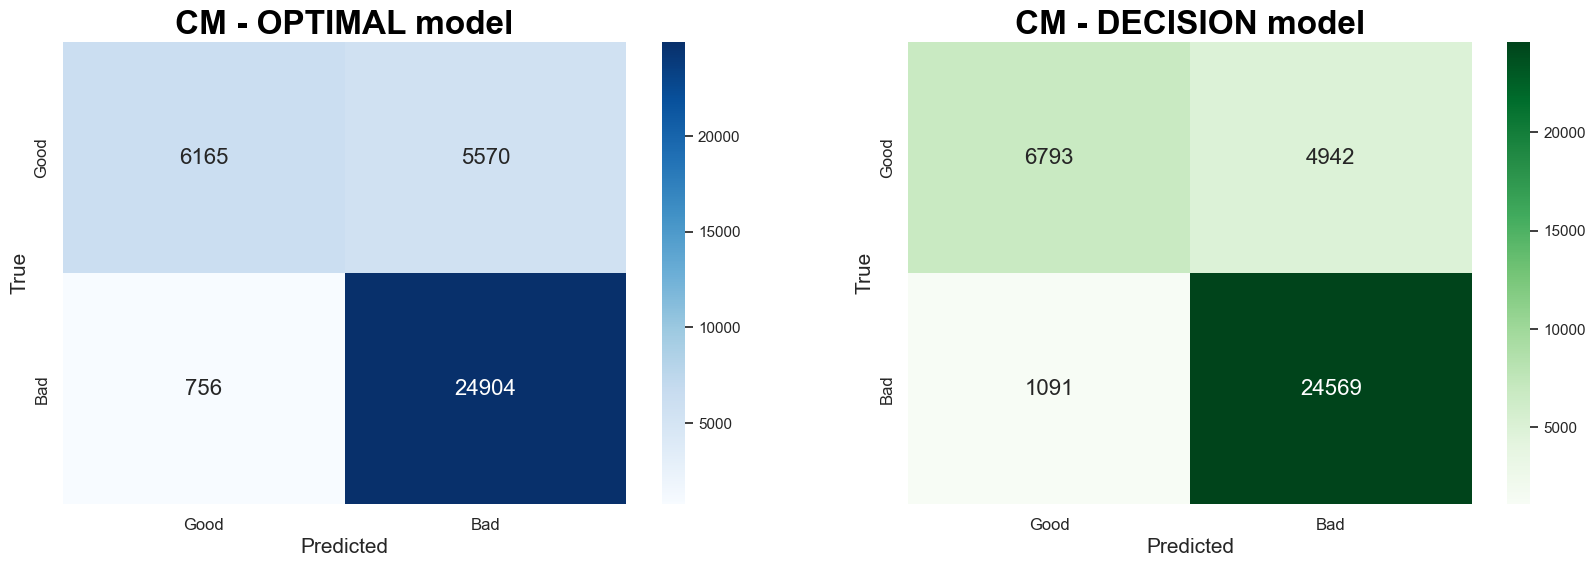

In [54]:
# OPTICAL and DECISION model confusion matrices
cm_OPT = confusion_matrix(y_test, Pred_OPT_Log)
cm_DEC = confusion_matrix(y_test, Pred_DEC_Log)

plt.figure(figsize=(20,6))

# OPTIMAL model Confusion Matrix
plt.subplot(121)
plt.title('CM - OPTIMAL model', fontweight='bold', color='black', fontsize='24', horizontalalignment='center')
sns.heatmap(cm_OPT, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.xticks(ticks=[0.5, 1.5], labels=['Good', 'Bad'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Good', 'Bad'], fontsize=12, va='center')

# DECISION model Confusion Matrix
plt.subplot(122)
plt.title('CM - DECISION model', fontweight='bold', color='black', fontsize='24', horizontalalignment='center')
sns.heatmap(cm_DEC, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.xticks(ticks=[0.5, 1.5], labels=['Good', 'Bad'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Good', 'Bad'], fontsize=12, va='center')


### Decision tree Model

In [55]:
#Create decision tree using raw data
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9998752050203238
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17899
           1       1.00      1.00      1.00     38193

    accuracy                           1.00     56092
   macro avg       1.00      1.00      1.00     56092
weighted avg       1.00      1.00      1.00     56092



In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

dt_model_scaled = DecisionTreeClassifier(random_state=42)

dt_model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = dt_model_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy with scaled data:", accuracy_scaled)

print("Classification Report with scaled data:")
print(classification_report(y_test, y_pred_scaled))

#Create decision tree using scaled data

Accuracy with scaled data: 0.9998752050203238
Classification Report with scaled data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17899
           1       1.00      1.00      1.00     38193

    accuracy                           1.00     56092
   macro avg       1.00      1.00      1.00     56092
weighted avg       1.00      1.00      1.00     56092



In [57]:
from sklearn.model_selection import RandomizedSearchCV

vartrain = X_train
vartest = X_test

grid={"criterion": ['gini', 'entropy'], "max_depth" : [None, 10, 20, 30, 40],
      'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

model_random = DecisionTreeClassifier(random_state = 42)
dt_model_random=RandomizedSearchCV(model_random,grid,cv=5)
dt_model_random.fit(vartrain,y_train)

print("tuned hyperparameters :(best parameters) ",dt_model_random.best_params_)
print("accuracy :",dt_model_random.best_score_)

tuned hyperparameters :(best parameters)  {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40, 'criterion': 'entropy'}
accuracy : 0.9999694376528117


In [58]:
vartrain = X_train
vartest = X_test

#Set the model properties
model_dt = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf =1, max_depth = 40, criterion= 'entropy', random_state = 42)


In [59]:
#Assess with the model
model_dt.fit(vartrain, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, random_state=42)

In [60]:
#Predict with the model
dt_model_pred = model_dt.predict(vartest)
dt_model_prob = model_dt.predict_proba(vartest)

In [61]:
print('Confusion Matrix:')
cm_dt = confusion_matrix(y_test, dt_model_pred)
print(cm_dt)
print("")

#Assess with the model
score = model_dt.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

Confusion Matrix:
[[17899     0]
 [    0 38193]]

Accuracy Score: 1.0000


In [62]:
X_names = pd.DataFrame(list(X.columns))
df_fi = pd.DataFrame(model_dt.feature_importances_)

In [63]:
df_feat_imp = pd.concat([X_names, df_fi], axis = 1)
df_feat_imp.columns = ['Features', 'dt_importance']

### Random Forest Model

In [64]:
def modeltraintest(var_train, var_test, y_train, y_test, model):
    # Fit the model
    model.fit(var_train, y_train)

    # Predict with the model
    model_pred = model.predict(var_test)
    model_prob = model.predict_proba(var_test)

    # Assess the model
    score = model.score(var_test, y_test)

    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")


    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")


    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')

    # ROC AUC Score and Chart
    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob))

    # Cross-validation
    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_accuracy = cross_val_score(model, var_train, y_train, cv=5, scoring='accuracy')
    cv_roc_auc = cross_val_score(model, var_train, y_train, cv=5, scoring='roc_auc')
    print('CV Accuracy Scores:', cv_accuracy)
    print('CV ROC AUC:', cv_roc_auc)

    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    print('')


In [65]:
def shorttraintest(var_train, var_test, y_train, y_test, model):
    # Fit the model
    model.fit(var_train, y_train)

    # Predict with the model
    model_pred = model.predict(var_test)
    model_prob = model.predict_proba(var_test)

    # Print evaluation metrics
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, model_pred))
    print('Accuracy Score:', '{:.4f}'.format(model.score(var_test, y_test)))
    print('Recall Score:', '{:.4f}'.format(recall_score(y_test, model_pred)))
    print('Precision Score:', '{:.4f}'.format(precision_score(y_test, model_pred)))
    print('ROC AUC Score:', '{:.4f}'.format(roc_auc_score(y_test, model_prob[:, 1])))
    print('')


XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
1.0

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[17899     0]
 [    0 38193]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17899
           1       1.00      1.00      1.00     38193

    accuracy                           1.00     56092
   macro avg       1.00      1.00      1.00     56092
weighted avg       1.00      1.00      1.00     56092


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



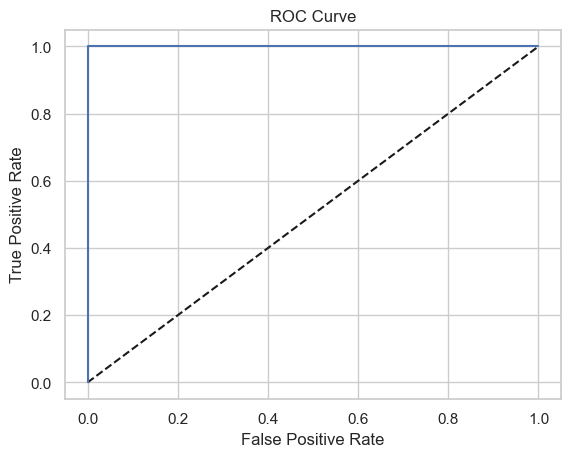

ROC AUC Score: 1.0
XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores: [1. 1. 1. 1. 1.]
CV ROC AUC: [1. 1. 1. 1. 1.]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX



In [66]:
# Define the model
model = RandomForestClassifier(random_state=21)

# Run the model using the shorttraintest function for raw data
vartrain = X_train
vartest = X_test
modeltraintest(vartrain, vartest, y_train, y_test, model)

In [68]:
# Define the model
model = RandomForestClassifier(random_state=21)

# Run the model using the shorttraintest function for raw data
vartrain = X_train
vartest = X_test
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[17899     0]
 [    0 38193]]
Accuracy Score: 1.0000
Recall Score: 1.0000
Precision Score: 1.0000
ROC AUC Score: 1.0000



## Conclusion

#### Model Selection
* Logistic Regression was chosen for its efficiency and performance in binary classification problems, especially when the relationship between the independent variables and the dependent variable is approximately linear.
* The Decision Tree and Random Forest models were initially considered due to their interpretability and ability to handle non-linear relationships. However, they were not pursued further because of their high accuracy scores, which indicated a potential overfitting issue.

#### Feature Selection
The choice of features for predicting 'HighlyRated' vs. 'NotHighlyRated' was based on their predictive power and relevance, such as accommodations, number of bedrooms, location, reviews, and amenities. These features directly impact a guest's experience and, subsequently, their ratings.

#### Model Comparison and Selection
* The Logistic Regression model was selected as the optimal model based on its balanced performance across all metrics. It showed an accuracy score of 0.7648, recall of 0.8025, precision of 0.7201, and an ROC AUC score of 0.8445.
* Standard Scaled Data was used because it provided the best balance across performance metrics.
* A class weight of {0: 1, 1: 1} was found to be optimal, indicating no additional weighting was necessary to achieve the desired performance balance.

#### Conclusion and EDA Summary
* Exploratory Data Analysis (EDA) likely revealed that the selected features have significant differences in distribution between highly rated and not highly rated listings, justifying their use for the model.
* The Logistic Regression model performed well in terms of the trade-off between correctly identifying highly rated listings (high recall) and the precision of its predictions.
* The model's ROC AUC score suggests it has a good ability to distinguish between the two classes, which is critical for a binary classification problem.
* ***The Logistic Regression model*** is particularly adept at pinpointing the exact features that sway the ratings of an Airbnb listing. By honing in on key aspects like the number of bedrooms or the type of amenities offered, it sheds light on what really matters for a listing to be considered top-notch. This model doesn't just predict ratings; it tells us why one listing might be more appealing than another, offering practical tips for hosts looking to boost their appeal. For InsideAirbnb.com, incorporating this model into their dashboard means they can offer users more than just information—they can provide foresight and guidance, making the platform not just informative but also predictive and advisory.

#### Model Improvement Reflection:
I concentrated on refining the Logistic Regression model as it showed early signs of being a good fit for our specific classification task. The high levels of accuracy indicated by the Decision Tree and Random Forest models were promising at first glance. However, a deeper look suggested that this might not be the complete picture. A model that performs too well raises concerns about its ability to perform outside of the training dataset – a phenomenon known as overfitting. This is when a model becomes excellent at predicting data it has seen but stumbles when encountering new data.

Models like Decision Trees and Random Forests are particularly susceptible to overfitting if they aren't carefully calibrated. They can become too complex, capturing noise along with the signal in the training data. This wasn't an issue with Logistic Regression, which typically offers a more generalized and less complex model.